# Aplicación de MCMC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['w','k'])

In [ ]:
## True = negro, False = blaco
# declaramos una matriz de 8x8 booleana
Cm = np.zeros((8,8), dtype=bool)

# El valor inicial de la cadena sera el tablero blanco
X=[Cm.copy()]
CuadrosNegros = [X[-1].sum()]

In [ ]:
# definimos timepos final, inicial, e intermedios
Tf = 1000
Tiempos = [0,10,50,100,800,1000]
t=1

In [ ]:
matrices = [X[-1]]

In [ ]:
# iniciamos la caminata
while t <= Tf:
    # hacemos el volado
    ## Aguila = 0, Sol = 1
    volado = np.random.binomial(1,.5,1)[0]
    
    if volado == 0:     # Si sale aguila tenemos que X_{n+1} = X_{n}
        X.append(X[-1].copy())
    else:               # Si sale sol invertimos la casilla
        # Selecionamos una casilla al azar
        i,j = np.random.randint(0,8,2)
        # Invertimos esa casilla
        Cm[i,j] = not Cm[i,j]
        
        if Cm[i,j]:     # Si la casilla invertida es negra tenemos que verificar que sea un arreglo valido
            valido = True
            for n in range(4):      # Revisamos las 4 casillas adyacentes
                try :
                    if n == 0:
                        if Cm[i+1,j]:
                            valido = False
                            break
                    elif n == 1:
                        if Cm[i-1,j]:
                            valido = False
                            break
                    elif n == 2:
                        if Cm[i,j+1]:
                            valido = False
                            break
                    else:
                        if Cm[i,j-1]:
                            valido = False
                            break
                except IndexError:
                    pass
                
            if valido:      # Si es un arreglo valido lo asignamos como X_{n+1}
                X.append(Cm.copy())
            else:           # Si no es valido tenemos que X_{n+1} = X_{n}
                X.append(X[-1].copy())
                Cm=X[-1].copy()
        else:       # Si la casilla invertida es blanca es un arreglo valido
            X.append(Cm.copy())
        
    CuadrosNegros.append(X[-1].sum())
        
    if t in Tiempos:
        #print(f"t={t}\nX_{t}:\n{X[-1]}\ncuadros negros = {CuadrosNegros[-1]}")
        matrices.append(X[-1])
    t+=1

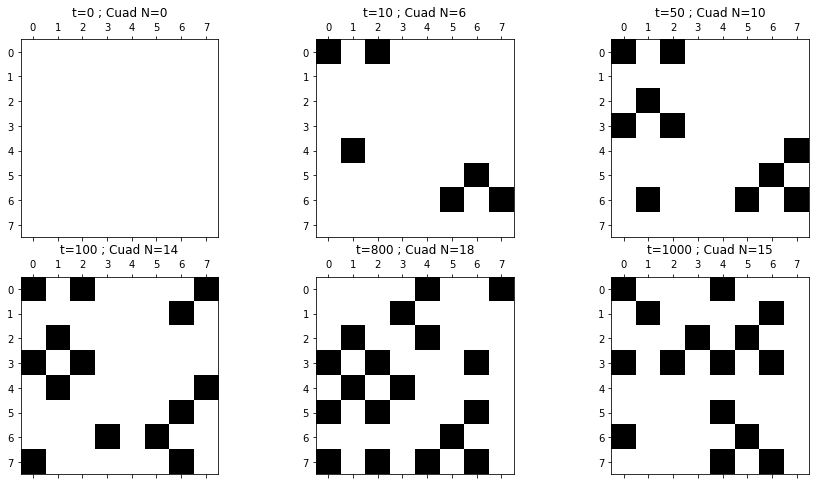

In [ ]:
fig,ax = plt.subplots(nrows=2, ncols=3, figsize=(15,8))

ax[0][0].matshow(matrices[0],cmap=cmap,)
ax[0][0].set_title(f"t=0 ; Cuad N={matrices[0].sum()}")
ax[0][1].matshow(matrices[1],cmap=cmap)
ax[0][1].set_title(f"t=10 ; Cuad N={matrices[1].sum()}")
ax[0][2].matshow(matrices[2],cmap=cmap)
ax[0][2].set_title(f"t=50 ; Cuad N={matrices[2].sum()}")
ax[1][0].matshow(matrices[3],cmap=cmap)
ax[1][0].set_title(f"t=100 ; Cuad N={matrices[3].sum()}")
ax[1][1].matshow(matrices[4],cmap=cmap)
ax[1][1].set_title(f"t=800 ; Cuad N={matrices[4].sum()}")
ax[1][2].matshow(matrices[5],cmap=cmap)
ax[1][2].set_title(f"t=1000 ; Cuad N={matrices[5].sum()}")
plt.show()

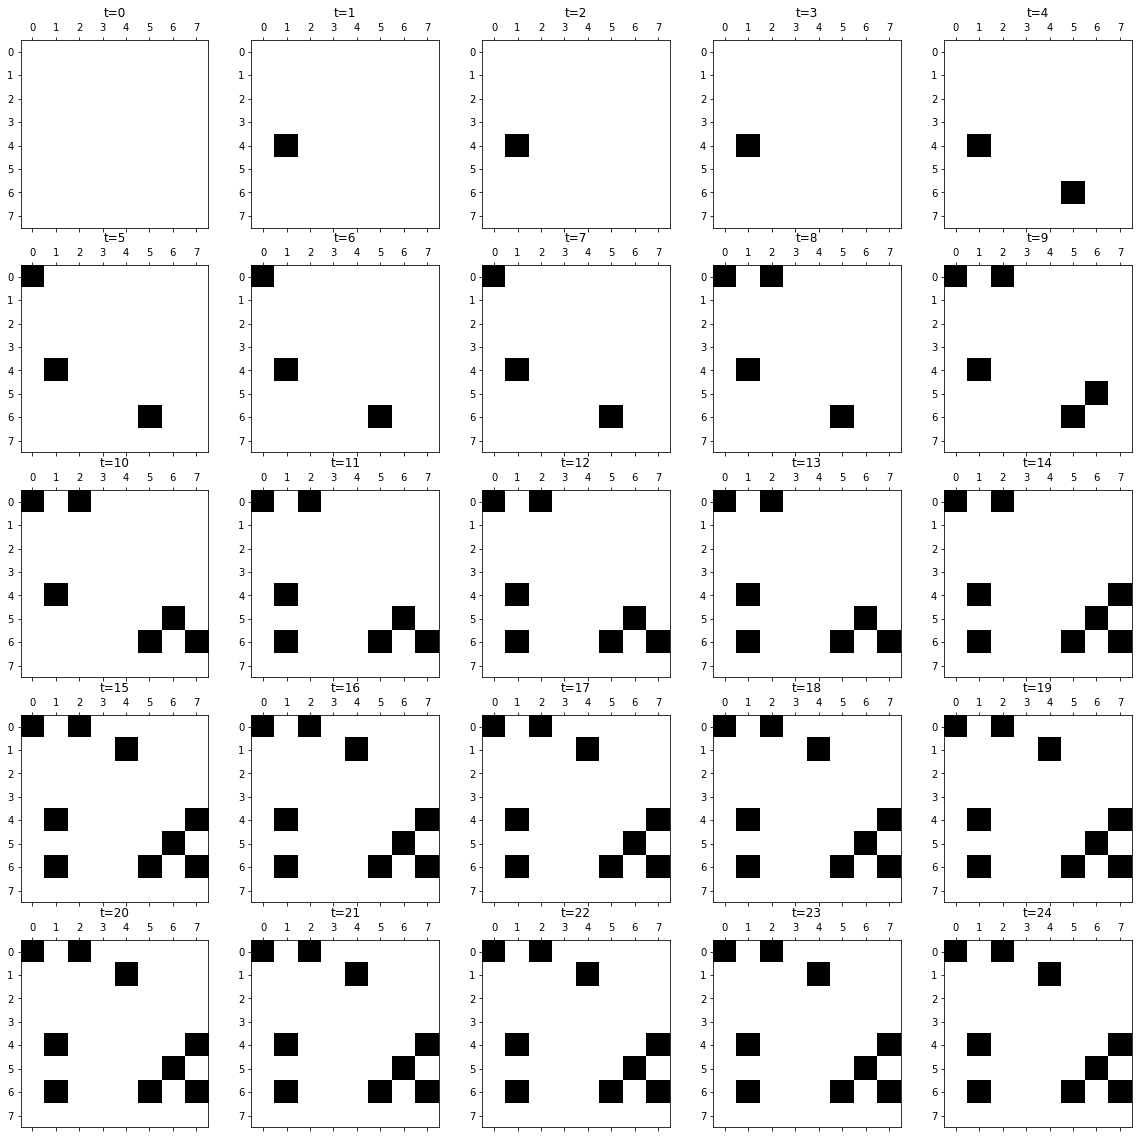

In [ ]:
fig,ax = plt.subplots(nrows=5, ncols=5, figsize=(20,20))
i,j=-1,-1
for k in range(25):
    j = k%5
    if k%5 == 0:
        i = i+1
    ax[i][j].matshow(X[k],cmap=cmap,)
    ax[i][j].set_title(f"t={k}")
plt.show()

Compactamos todo nuestro procedimiento en una función para después llamarla repetidas veces para nuestras simulaciones:

In [ ]:
def CaminataTableros(Cm=None,Tf=1000,Tiempos=None,):
    if Cm == None:
        Cm = np.zeros((8,8), dtype=bool)
    if Tiempos == None:
        Tiempos=[]
        
    X=[Cm.copy()]
    CuadrosNegros = [X[-1].sum()]
    t=1
    
    while t < Tf:
        volado = np.random.binomial(1,.5,1)[0]
        
        if volado == 0:
            X.append(X[-1].copy())
        else:               
            i,j = np.random.randint(0,8,2)
            Cm[i,j] = not Cm[i,j]
            
            if Cm[i,j]:  
                valido = True
                for n in range(4):
                    try :
                        if n == 0:
                            if Cm[i+1,j]:
                                valido = False
                                break
                        elif n == 1:
                            if Cm[i-1,j]:
                                valido = False
                                break
                        elif n == 2:
                            if Cm[i,j+1]:
                                valido = False
                                break
                        else:
                            if Cm[i,j-1]:
                                valido = False
                                break
                    except IndexError:
                        pass
                    
                if valido:
                    X.append(Cm.copy())
                else:
                    X.append(X[-1].copy())
                    Cm=X[-1].copy()
            else:
                X.append(Cm.copy())
            
        CuadrosNegros.append(X[-1].sum())
            
        if t in Tiempos:
            matrices.append(X[-1])
        t+=1
    return np.array(CuadrosNegros),X

In [ ]:
sims=500
n=1000

CuadrosNegros = []
SumCuadrosNegros = np.array([0]*n)

for s in range(sims):
    cn,_ = CaminataTableros(Tf=n)
    CuadrosNegros.append(cn)
    
for cd in CuadrosNegros:
    SumCuadrosNegros = SumCuadrosNegros+cd

PromedioCuadrosNegros = SumCuadrosNegros/sims

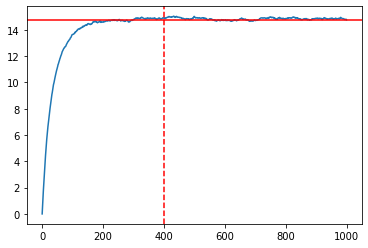

In [ ]:
x=range(n)
plt.plot(x,PromedioCuadrosNegros)
plt.axhline(y=14.75,c='red')
plt.axvline(x=400,c='red', linestyle='--')
plt.show()

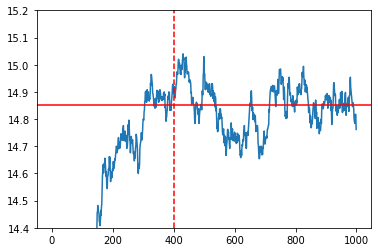

In [ ]:
x=range(n)
plt.plot(x,PromedioCuadrosNegros)
plt.ylim(14.4,15.2)
plt.axhline(y=14.85,c='red')
plt.axvline(x=400,c='red', linestyle='--')
plt.show()

Al graficar los promedios de cuadros negros para $500$ simulaciones podemos ver como después de cierto valore este promedio oscila alrededor de $14.75$. 

A parir del tiempo $400$ la caminata que definimos se queda en estos valores, en otras palabras alcanza una distribución estacionaria. Esta distribución es la que buscamos en un principio ya que nos garantiza que todas las muestras que obtengamos de ella pertenecerán a la distribución que no conocemos. 

Tomando en cuenta este tiempo podemos cortar nuestra caminata en $400$ y solo tomar lo que tenemos después como muestras de nuestra distribución. 


In [ ]:
n=1000
cn,x =CaminataTableros(Tf=n)
Muestras = x[400:]

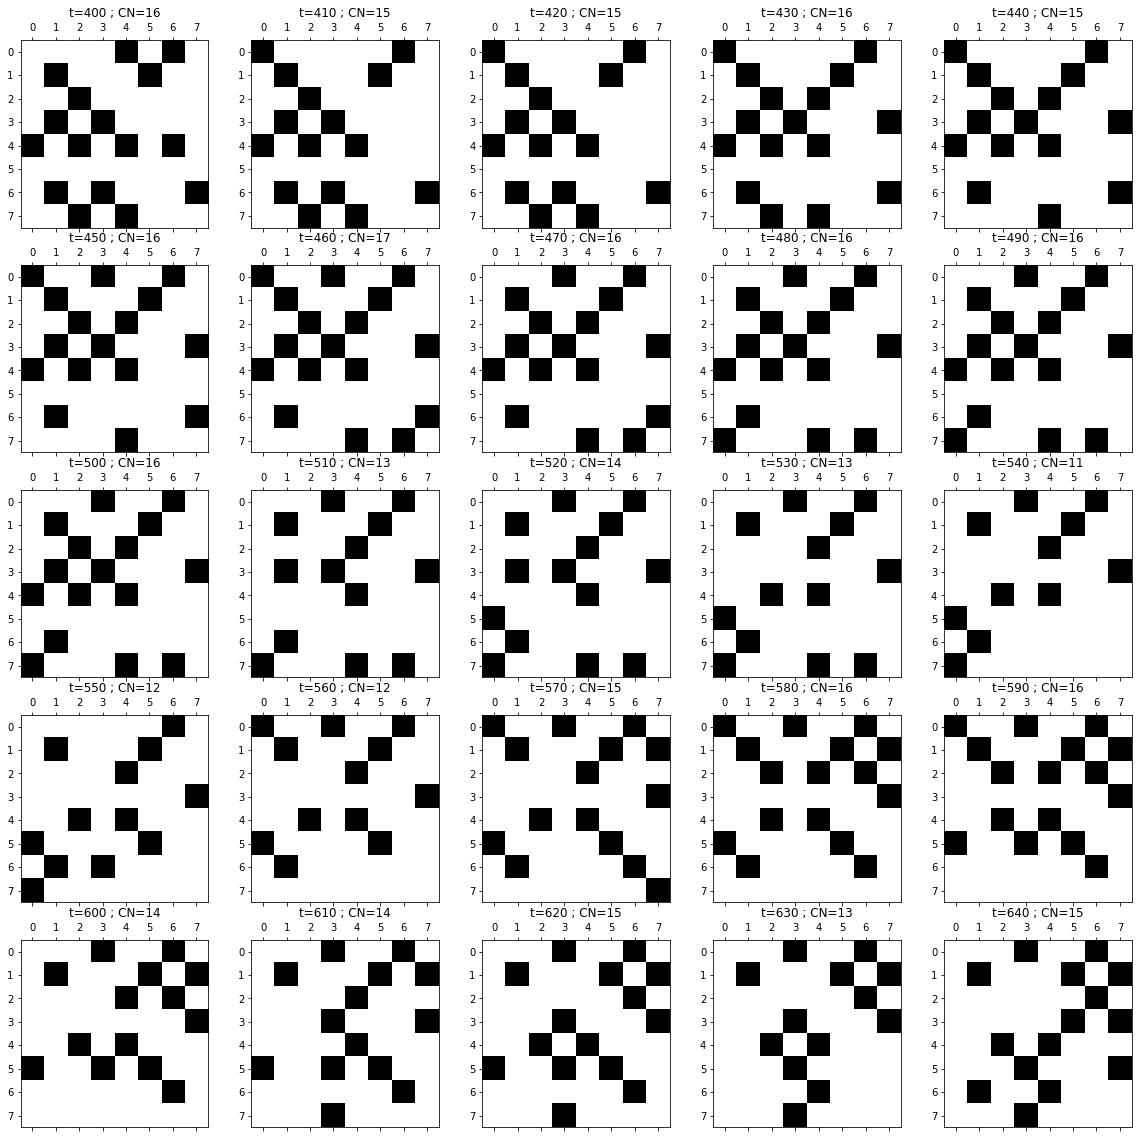

In [ ]:
fig,ax = plt.subplots(nrows=5, ncols=5, figsize=(20,20))
i,j=-1,-1
for k in range(25):
    j = k%5
    if k%5 == 0:
        i = i+1
    ax[i][j].matshow(Muestras[k*10],cmap=cmap,)
    ax[i][j].set_title(f"t={400+k*10} ; CN={Muestras[k*10].sum()}")
plt.show()